# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# get packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
import math

from scipy.stats import norm

# load in dataframe from csv
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# initial peek at the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

### 1. Is the distribution of body temperatures normal?

Based on the following histogram of the body temperature values, you could say that they are more or less normally distributed. They have a mean of 98.25 and the p-value of the normaltest is 0.25875, which means we can maintain the hypothesis that these data are normally distributed.

In [23]:
# prepare data for histogram
# sort the temps
ordered_temps = df.temperature.sort_values()

# define bins
bins = np.arange(ordered_temps.min(), ordered_temps.max(), 0.05)

# get mean and stdev of temps
mean, stdev = ordered_temps.mean(), ordered_temps.std()

# draw what normal dist looks like with this mean/std
norm_dist = norm.pdf(ordered_temps, mean, stdev)

C:\Users\FKBOX\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


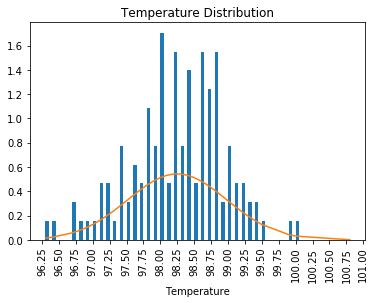

In [31]:
# labels
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
# min is 96.3 and max is 100.8, create ticks accordingly 
plt.xticks(np.arange(95.5, 101.5, 0.25), rotation=90)

# create histogram
plt.hist(ordered_temps, bins, normed=True, stacked=True)
# overlay normal distribution
plt.plot(ordered_temps, norm_dist)

In [33]:
# normal test gives a p-value of 0.25875
print(scipy.stats.normaltest(ordered_temps))

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)


### 2. Is the sample size large? Are the observations independent?

With 130 observations in this data set, we can consider this sample size relatively large ($ \ge 30 $). The observations are independent because none of the observations influence the others - they are all recorded separately and without referencing another data point.

In [34]:
len(df.temperature)

130

### 3. Is the true population mean really 98.6 degrees F?

After resampling 10000 times and recording the mean of each result, it seems like the mean actually lies closer to 98.2.

In [42]:
# create empty array for storing bootstrap means
df_means = np.empty(10000)
# duplicate dataframe
df_bs = df.copy()

# perform 1000 resamplings, save the Temperature means in df_means
for i in range(10000) :
    bs_sample = np.random.choice(df['temperature'], size=130)
    df_bs['temperature'] = bs_sample
    df_means[i] = np.mean(df_bs['temperature'])
    
# print mean of all the sample means
np.mean(df_means)

98.24869584615384

In this case, it is best to use a one-sample test to compare these data to the proposed value of 98.6, since we just have this one collected dataset without any sort of change introduced. We can assert whether or not the population mean is truly 98.6 by checking if the sample mean is significantly different. 

For this study, we will use

**Null Hypothesis**: Sample Mean = Population Mean (no significant difference)

**Alternate Hypothesis**: Sample Mean ≠ Population Mean (significant difference)

Although our sample size is fairly large, I will use *t-test* first since we do not know the population standard deviation. The formula for this is 

$$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $s$ is the sample standard deviation, and $n$ is the sample size. In addition, the critical t-value in a two-tailed test for a 95% confidence interval with 129 degrees of freedom is about **1.984.**

In [58]:
# fill in formula values
sample_mean = ordered_temps.mean()
pop_mean = 98.6
sample_std = ordered_temps.std()
sample_size = len(ordered_temps)

# calculate t-score
t_score = (sample_mean - pop_mean)/(sample_std/np.sqrt(sample_size))

# calculate p-value
pvalue = scipy.stats.t.sf(np.abs(t_score), sample_size-1)*2

print("t-score: " + str(t_score) + "\np-value: " + str(pvalue))

t-score: -5.454823292364301
p-value: 2.4106320415585427e-07


Since we observe the t-score to be quite different from the critical value and the p-value being significantly small (**p<0.05**), we can reject the null hypothesis. It is unlikely that the population mean and sample mean are equal, meaning the commonly accepted 98.6 doesn't quite match the mean we observed in this dataset.

In [59]:
# confirm t-score and p-value
scipy.stats.ttest_1samp(ordered_temps,98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

The z-test is similar, but it requires that we know the population standard deviation. Since we do not have this information, the best we can do is substitute the sample standard deviation. This formula would be

$$t = \frac{\bar{x}-\mu}{\sigma} $$

where $\bar{x}$ is the sample mean, $\mu$ is the population mean, and $\sigma$ is the population standard deviation. However, in this case, we will be using the sample standard deviation since that is the only information we have.

In [65]:
# calculate z-score
z_score = (sample_mean - pop_mean)/(sample_std)

# calculate p-value
pvalue_z = scipy.stats.norm.sf(abs(z_score))*2

print("z-score: " + str(z_score) + "\np-value: " + str(pvalue_z))

z-score: -0.4784196512470882
p-value: 0.6323515496610721


Using the z-statistic gives us a much different answer, since we are treating the sample standard deviation as the value to go along with the asserted population mean of 98.6. This test now makes it seem like 98.6 could be a possible mean, though I would hesitate to use this result since, by convention, we should be using the t-statistic for this case.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

When working with a smaller sample of 10 data points, it would be better to use the t-statistic test. We will likely see a big difference in these tests since the population mean/std is taken from 130 data points, while this sample is from just 10.

In [82]:
# take a random sample of 10 data points
sample = np.random.choice(ordered_temps, size=10)

# assign values needed for formulas
mu = ordered_temps.mean()
std = ordered_temps.std()
mean_10 = sample.mean()
std_10 = sample.std()

# calculate z- and t-scores
z_10 = (mean_10 - mu)/(std)
t_10 = (mean_10 - mu)/(std/np.sqrt(10))

print("z-score: " + str(z_10) + "\nt-score: " + str(t_10))

z-score: 0.06924494952260894
t-score: 0.2189717569548334


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

If we take a look at the percentile range, 96.7225 is at the 2.5 percentile and 99.4775 is at the 97.5 percentile. Judging by the data alone, we would identify anything lower or higher than those to be abnormal. Of course, there is some flexibility in these numbers in a medical sense, but it is still interesting to see the variability during a study.

In [60]:
np.percentile(ordered_temps, [2.5, 97.5])

array([96.7225, 99.4775])

### 6. Is there a significant difference between males and females in normal temperature?

After plotting the data and checking the mean, median, and st.dev. of both males and females, it seems females are just a tad bit higher on average, with a slightly larger range as well. Overall, I would say that the data suggests that females experience slightly higher body temperatures, and even faster heart rates.

In [16]:
print("Male Temp. Mean: ", np.mean(df_male['temperature']), "Male Temp. St. Dev.: ", np.std(df_male['temperature']), 
      "Male Temp. Median: ", np.median(df_male['temperature']),
      "\nFemale Temp. Mean: ", np.mean(df_female['temperature']), "Female Temp. St. Dev.: ", np.std(df_female['temperature']),
      "Female Temp. Median: ", np.median(df_female['temperature']))

Male Temp. Mean:  98.1046153846154 Male Temp. St. Dev.:  0.6933598841828696 Male Temp. Median:  98.1 
Female Temp. Mean:  98.39384615384613 Female Temp. St. Dev.:  0.7377464486428966 Female Temp. Median:  98.4


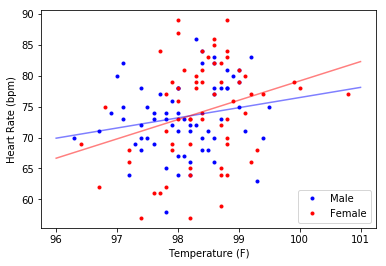

In [13]:
# split up data by gender
df_male = df[df['gender']=='M']
df_female = df[df['gender']=='F']

# prepare for creating best fit lines
temps = [96, 97, 98, 99, 100, 101]
male_line = np.empty(6)
female_line = np.empty(6)

# find slope and intercept for male and female data
slope_male, intercept_male = np.polyfit(df_male['temperature'], df_male['heart_rate'], 1)
slope_female, intercept_female = np.polyfit(df_female['temperature'], df_female['heart_rate'], 1)

# create y values for temps in range 96 - 101
for i in range(6):
    male_line[i] = (slope_male * temps[i]) + intercept_male
    female_line[i] = (slope_female * temps[i]) + intercept_female

# plot both males and females on same plot
_ = plt.plot(df_male['temperature'], df_male['heart_rate'], color='blue', marker='.', linestyle='none')
_ = plt.plot(df_female['temperature'], df_female['heart_rate'], color='red', marker='.', linestyle='none')

# plot best fit lines
_ = plt.plot(temps, male_line, color='blue', alpha=0.5)
_ = plt.plot(temps, female_line, color='red', alpha=0.5)

# label axes
plt.legend(('Male', 'Female'), loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Heart Rate (bpm)')